In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

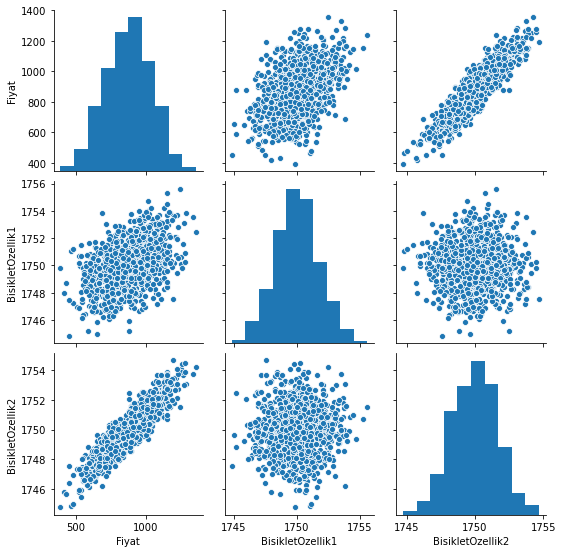

In [5]:
sbn.pairplot(dataFrame)

In [6]:
#VERİLERİ BÖLME

from sklearn.model_selection import train_test_split

In [7]:
#train_test_split

In [8]:
y= dataFrame["Fiyat"].values
x= dataFrame[["BisikletOzellik1", "BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(x_train)

MinMaxScaler()

In [14]:
x_train = scaler.transform (x_train)
x_test = scaler.transform (x_test)

In [15]:
x_train


array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [16]:
#MODEL OLUŞTURMA

import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")


In [19]:
#EĞİTİM

model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795772.4375
Epoch 2/250
21/21 [==============================] - 0s 855us/step - loss: 795607.6250
Epoch 3/250
21/21 [==============================] - 0s 950us/step - loss: 795430.1875
Epoch 4/250
21/21 [==============================] - 0s 855us/step - loss: 795234.1875
Epoch 5/250
21/21 [==============================] - 0s 902us/step - loss: 795018.2500
Epoch 6/250
21/21 [==============================] - 0s 949us/step - loss: 794778.1875
Epoch 7/250
21/21 [==============================] - 0s 855us/step - loss: 794510.5000
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794216.0000
Epoch 9/250
21/21 [==============================] - 0s 902us/step - loss: 793886.2500
Epoch 10/250
21/21 [==============================] - 0s 950us/step - loss: 793520.5625
Epoch 11/250
21/21 [==============================] - 0s 855us/step - loss: 793117.8750
Epoch 12/250
21/21 [=========================

In [20]:
loss = model.history.history["loss"]

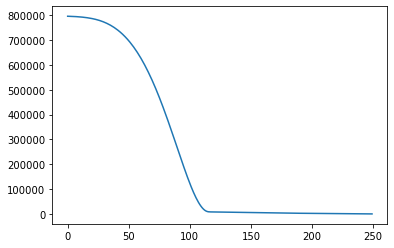

In [21]:
sbn.lineplot(x=range(len(loss)), y=loss)

In [22]:
trainLoss = model.evaluate(x_train, y_train)

21/21 [==============================] - 0s 1ms/step - loss: 313.6763


In [23]:
testLoss = model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 907us/step - loss: 302.5925


In [24]:
testTahminleri = model.predict(x_test) #x_test'i vereceğiz y_test'i tahmin edecek.

In [25]:
testTahminleri

array([[1059.0747 ],
       [ 648.67535],
       [ 877.11395],
       [ 890.4572 ],
       [ 894.7142 ],
       [ 487.9174 ],
       [ 925.7968 ],
       [ 979.8328 ],
       [ 937.66864],
       [1003.5732 ],
       [ 763.9132 ],
       [ 916.2766 ],
       [ 939.10297],
       [1038.6237 ],
       [1100.8368 ],
       [ 699.62555],
       [1101.2554 ],
       [ 669.623  ],
       [1125.854  ],
       [ 886.4145 ],
       [ 891.471  ],
       [ 734.2926 ],
       [ 499.5286 ],
       [ 634.5827 ],
       [ 840.50055],
       [1072.297  ],
       [ 728.7587 ],
       [ 767.644  ],
       [ 872.5356 ],
       [ 780.2424 ],
       [ 490.5474 ],
       [ 793.4297 ],
       [ 742.2862 ],
       [ 667.54956],
       [ 885.40814],
       [ 846.7344 ],
       [1021.46515],
       [1007.3649 ],
       [ 848.97687],
       [ 862.91016],
       [ 769.10114],
       [1145.0935 ],
       [1076.9409 ],
       [1068.4829 ],
       [ 876.4104 ],
       [ 623.63776],
       [1117.4666 ],
       [ 962.

In [26]:
tahminDF = pd.DataFrame(y_test, columns=["Gerçek Y"])

In [27]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [29]:
testTahminleri = pd.Series(testTahminleri.reshape(330))

In [30]:
testTahminleri

0      1059.074707
1       648.675354
2       877.113953
3       890.457214
4       894.714172
          ...     
325    1001.511536
326     797.515076
327     777.808777
328    1141.143311
329     807.384094
Length: 330, dtype: float32

In [31]:
tahminDF = pd.concat([tahminDF,testTahminleri],axis=1)

In [32]:
tahminDF.columns = ["Gerçek Y", "Tahmin Y"]

In [33]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1059.074707
1,622.675990,648.675354
2,889.356810,877.113953
3,902.826733,890.457214
4,897.662404,894.714172
...,...,...
325,1028.438035,1001.511536
326,789.934950,797.515076
327,758.490486,777.808777
328,1172.871659,1141.143311


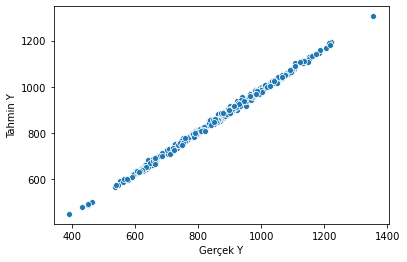

In [34]:
sbn.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDF)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

14.073669574457858

In [37]:
mean_squared_error(tahminDF["Gerçek Y"], tahminDF["Tahmin Y"])

302.5924901661023

In [39]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [41]:
yeniBisikletOzellikleri = [[1760,1758]]

In [43]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [44]:
model.predict(yeniBisikletOzellikleri)

array([[1885.4059]], dtype=float32)

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save("bisiklet_modeli.h5")

In [48]:
modelCagirma = load_model("bisiklet_modeli.h5")